In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plotting_utils import set_fontsize, render_in_latex, get_project_runs, filter_runs, plot_runs

In [3]:
def get_rank_criteria(r):
    criteria1 = {
    "optimizer": lambda run: run.config["opt"] in ["askotch"],
    "r": lambda run: run.config["precond_params"]["r"] == r,
    }
    criteria2 = {
        "optimizer": lambda run: run.config["opt"] in ["pcg"],
        "precision": lambda run: run.config["precision"] == "float64",
        "r": lambda run: run.config["precond_params"]["r"] == r,
    }
    criteria3 = {
        "optimizer": lambda run: run.config["opt"] in ["pcg"],
        "m": lambda run: run.config["m"] == 20000,
        "precision": lambda run: run.config["precision"] == "float64",
    }

    return criteria1, criteria2, criteria3

In [4]:
fontsize = 14
entity_name = "sketchy-opts"
project_name1 = "homo_full_krr_v2"
project_name2 = "homo_inducing_krr_v2"

rs = [10, 20, 50, 100, 200, 500, 1000]

hparams_to_label = {
    "askotch": ["b"],
    "skotch": ["b"],
    "pcg": ["precond"],
}

metric = "smape"
x_axis = "time"

save_dir = "./plots/homo"

In [5]:
set_fontsize(14)

# Render plots in LaTeX
render_in_latex()

In [6]:
runs_full_krr = get_project_runs(entity_name, project_name1)
runs_inducing_krr = get_project_runs(entity_name, project_name2)

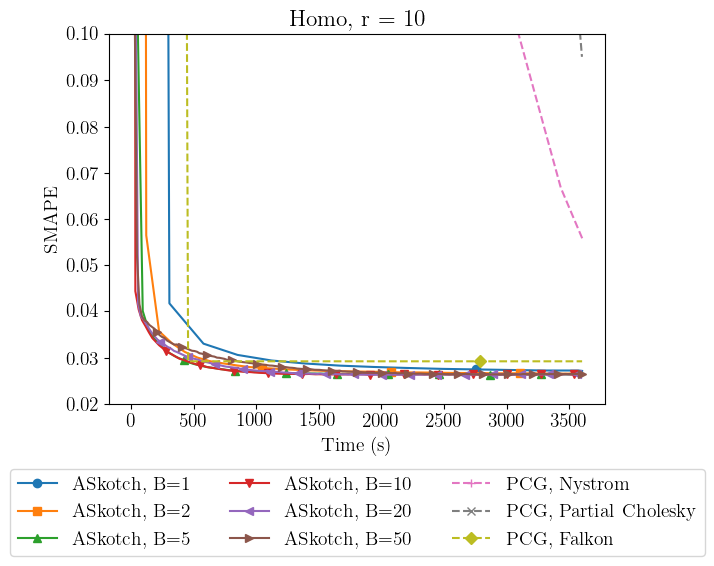

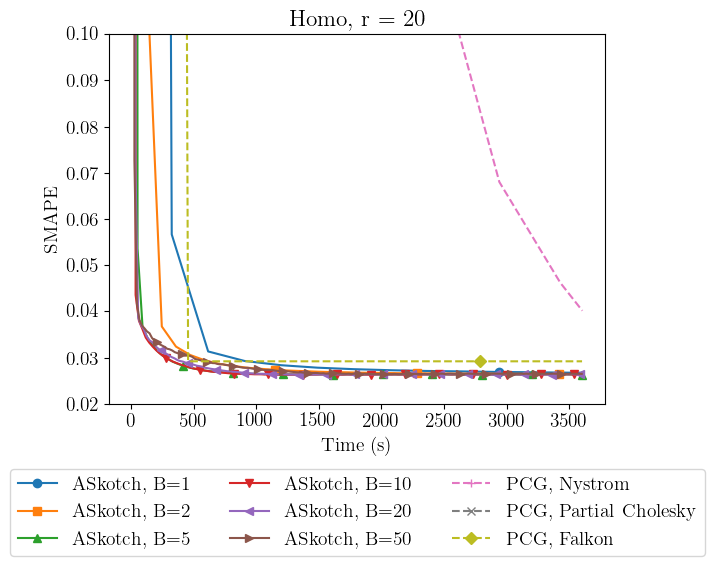

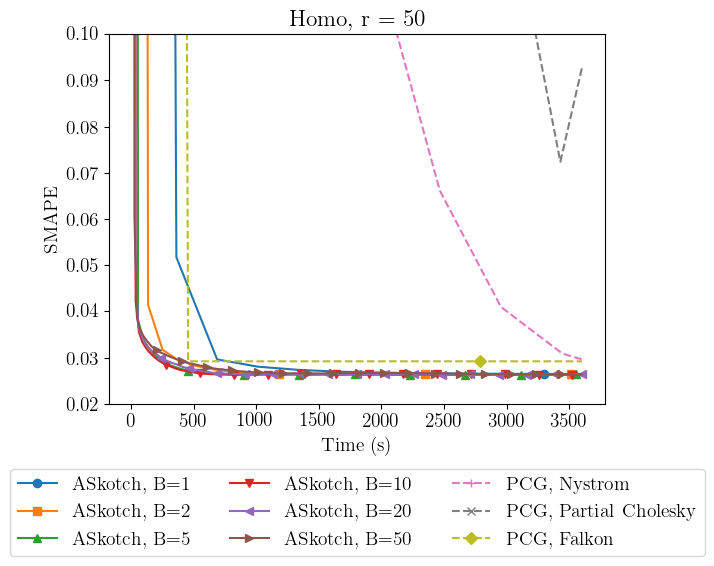

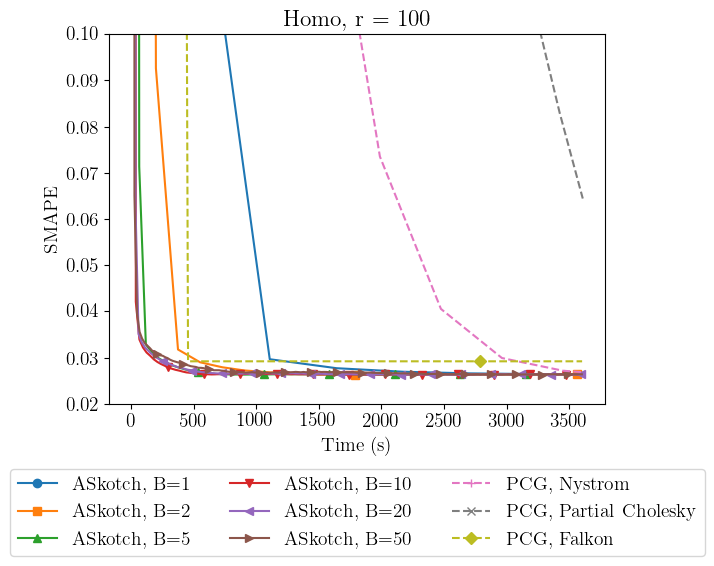

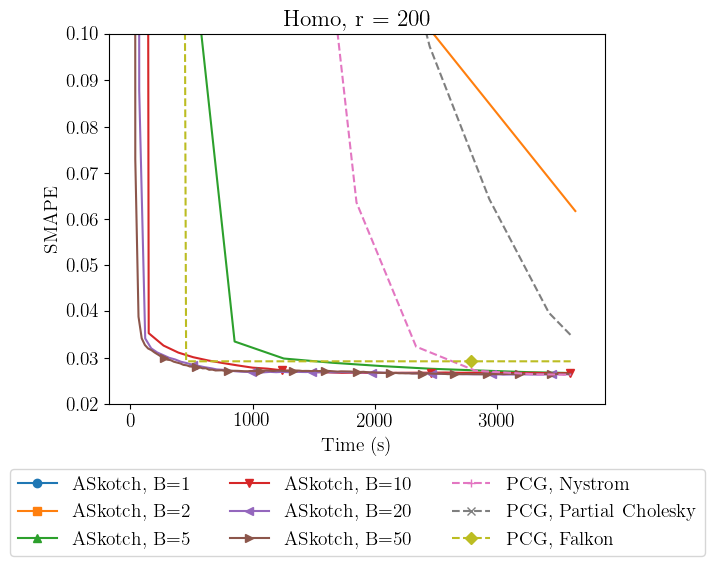

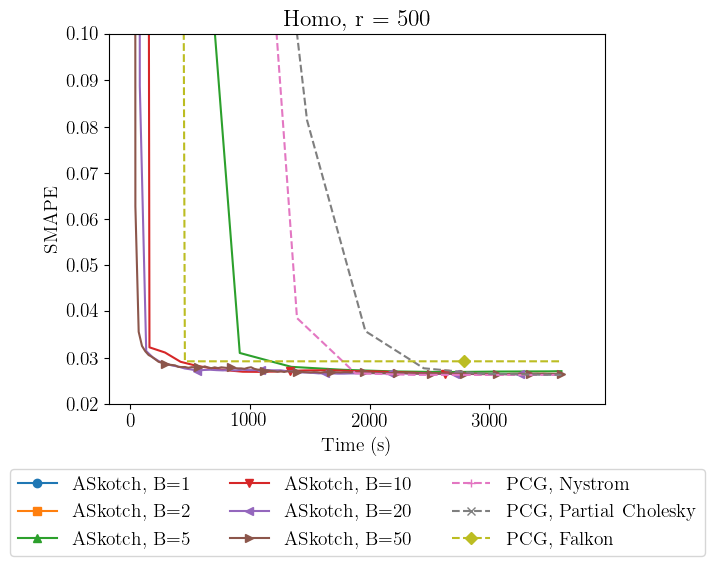

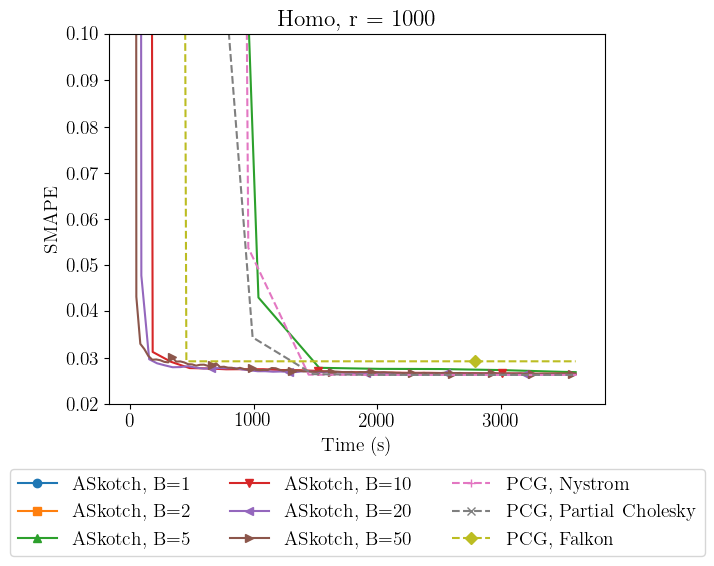

In [7]:
for r in rs:
    criteria1, criteria2, criteria3 = get_rank_criteria(r)

    c_runs1 = filter_runs(runs_full_krr, criteria1)
    c_runs2 = filter_runs(runs_full_krr, criteria2)
    c_runs3 = filter_runs(runs_inducing_krr, criteria3)

    all_runs = c_runs1 + c_runs2 + c_runs3

    plot_runs(all_runs, hparams_to_label, metric, x_axis, [0.02, 0.1], f"Homo, r = {r}",
           save_dir, f"{metric}_vs_{x_axis}_r_{r}.pdf")

In [8]:
# c_runs1 = filter_runs(runs_full_krr, criteria1)
# c_runs2 = filter_runs(runs_full_krr, criteria2)
# c_runs3 = filter_runs(runs_inducing_krr, criteria3)

# print(f"Found {len(c_runs1)} runs")
# print(f"Found {len(c_runs2)} runs")
# print(f"Found {len(c_runs3)} runs")

# all_runs = c_runs1 + c_runs2 + c_runs3

In [9]:
# plot_runs(all_runs, hparams_to_label, "smape", "time", [0.02, 0.1], f"Homo, r = {r}",
#            save_dir, "smape_vs_time.pdf")